# Metadata analysis

In [1]:
import pandas as pd
import numpy as np
import bs4
import requests
import string
%matplotlib inline

In [2]:
def int_str(a_string):
    try:
        return int(a_string)
    except:
        return 0

def info_from_youtube(youtube_video_url):
    """
    Retrieve information from a YouTube url."""
    try:
        soup = bs4.BeautifulSoup(requests.get(youtube_video_url).text, 'lxml')
        title = soup.title.text.strip()
        views_text = soup.find('div', attrs = {'class':'watch-view-count'}).text
        views = int_str(''.join([c for c in views_text if c in string.digits]))
        published_text = soup.find('strong', attrs = {'class':'watch-time-text'}).text
        published = int_str(''.join([c for c in published_text[-4:] if c in string.digits]))
        publisher = soup.find('div', attrs = {'class':'yt-user-info'}).text.strip('\n')
        num_likes_text = soup.find('button', attrs = {'class':'like-button-renderer-like-button'}).text
        num_likes = int_str(''.join([c for c in num_likes_text if c in string.digits]))
        percentage_likes_text = soup.find('div', attrs = {'class':'video-extras-sparkbar-likes'})['style']
        percentage_likes = float(''.join([c for c in percentage_likes_text if c in string.digits + '.']))

        return {'url':youtube_video_url.strip(), 
                'title':title, 
                'views':views, 
                'published_yr':published, 
                'publisher':publisher,
                'num_likes':num_likes, 
                'percentage_likes':percentage_likes}
    except:
        return None

In [3]:
urls = [
'https://www.youtube.com/watch?v=OB1reY6IX-o',
'https://www.youtube.com/watch?v=80fZrVMurPM',
'https://www.youtube.com/watch?v=gtejJ3RCddE',
'https://www.youtube.com/watch?v=Ejh0ftSjk6g',
'https://www.youtube.com/watch?v=ZgHGCfwExw0',
'https://www.youtube.com/watch?v=6ohWS7J1hVA',
'https://www.youtube.com/watch?v=MKucn8NtVeI',
'https://www.youtube.com/watch?v=He9MCbs1wgE',
'https://www.youtube.com/watch?v=XbxIo7ScVzc',
'https://www.youtube.com/watch?v=EKUy0TSLg04',
'https://www.youtube.com/watch?v=2kT6QOVSgSg',
'https://www.youtube.com/watch?v=lKcwuPnSHIQ',
'https://www.youtube.com/watch?v=5Md_sSsN51k',
'https://www.youtube.com/watch?v=-lXfsWP7DJ8',
'https://www.youtube.com/watch?v=v5mrwq7yJc4',
'https://www.youtube.com/watch?v=p7Mj-4kASmI',
'https://www.youtube.com/watch?v=1AwG0T4gaO0',
'https://www.youtube.com/watch?v=8Jktm-Imt-I',
'https://www.youtube.com/watch?v=rARMKS8jE9g',
'https://www.youtube.com/watch?v=38R7jiCspkw',
'https://www.youtube.com/watch?v=HN5d490_KKk',
'https://www.youtube.com/watch?v=xn9sTXR3Cp8',
'https://www.youtube.com/watch?v=RA_2qdipVng',
'https://www.youtube.com/watch?v=zmfe2RaX-14',
'https://www.youtube.com/watch?v=TMmSESkhRtI',
'https://www.youtube.com/watch?v=W5WE9Db2RLU',
'https://www.youtube.com/watch?v=FytuB8nFHPQ',
'https://www.youtube.com/watch?v=u682UpVrMVM',
'https://www.youtube.com/watch?v=E92jDCmJNek',
'https://www.youtube.com/watch?v=ThS4juptJjQ',
'https://www.youtube.com/watch?v=gSVvxOchT8Y',
'https://www.youtube.com/watch?v=tJ-O3hk1vRw',
'https://www.youtube.com/watch?v=HC0J_SPm9co',
'https://www.youtube.com/watch?v=ZIEyHdvF474',
'https://www.youtube.com/watch?v=9fOWryQq9J8',
'https://www.youtube.com/watch?v=E9XTOnEgqRY',
'https://www.youtube.com/watch?v=GMKZD1Ohlzk',
'https://www.youtube.com/watch?v=dye7rDktJ2E',
'https://www.youtube.com/watch?v=39vJRxIPSxw',
'https://www.youtube.com/watch?v=rIofV14c0tc',
'https://www.youtube.com/watch?v=cKPlPJyQrt4',
'https://www.youtube.com/watch?v=bvHgESVuS6Q',
'https://www.youtube.com/watch?v=k7hSD_-gWMw',
'https://www.youtube.com/watch?v=YkVscKsV_qk',
'https://www.youtube.com/watch?v=aXR2d9k9-h4',
'https://www.youtube.com/watch?v=XJOt4QQgx0A',
'https://www.youtube.com/watch?v=HTLu2DFOdTg',
'https://www.youtube.com/watch?v=Ta1bAMOMFOI',
'https://www.youtube.com/watch?v=jKBwGlYb13w',
'https://www.youtube.com/watch?v=u2KZJzoz-qI',
'https://www.youtube.com/watch?v=OSGv2VnC0go',
'https://www.youtube.com/watch?v=9zinZmE3Ogk',
'https://www.youtube.com/watch?v=p33CVV29OG8',
'https://www.youtube.com/watch?v=9zinZmE3Ogk',
'https://www.youtube.com/watch?v=p33CVV29OG8',
'https://www.youtube.com/watch?v=voXVTjwnn-U',
'https://www.youtube.com/watch?v=9zinZmE3Ogk',
'https://www.youtube.com/watch?v=_Ek3A2b-nHU',
'https://www.youtube.com/watch?v=zhpWhkW8kcc',
'https://www.youtube.com/watch?v=Dgnp28Ijm_M',
'https://www.youtube.com/watch?v=7i6kBz1kZ-A',
'https://www.youtube.com/watch?v=g-YCaX3ml2Q',
'https://www.youtube.com/watch?v=rfdzOZkDqYk',
'https://www.youtube.com/watch?v=5-qadlG7tWo',
'https://www.youtube.com/watch?v=j6VSAsKAj98',
'https://www.youtube.com/watch?v=js_0wjzuMfc',
'https://www.youtube.com/watch?v=Z_OAlIhXziw',
'https://www.youtube.com/watch?v=Bm96RqNGbGo',
'https://www.youtube.com/watch?v=x1ndXuw7S0s',
'https://www.youtube.com/watch?v=2AXuhgid7E4',
'https://www.youtube.com/watch?v=5JnMutdy6Fw',
'https://www.youtube.com/watch?v=9d5-Ti6onew',
'https://www.youtube.com/watch?v=CowlcrtSyME',
'https://www.youtube.com/watch?v=YGk09nK_xnM',
'https://www.youtube.com/watch?v=5XGycFIe8qE',
'https://www.youtube.com/watch?v=-NR-ynQg0YM',
'https://www.youtube.com/watch?v=oGzU688xCUs',
'https://www.youtube.com/watch?v=R2rCYf3pv-M',
'https://www.youtube.com/watch?v=vl9La7wH7QI',
'https://www.youtube.com/watch?v=Vs7tdobwj1k',
'https://www.youtube.com/watch?v=C6ni_WoMXhU',
'https://www.youtube.com/watch?v=sunNXIxIGV8',
'https://www.youtube.com/watch?v=I9NeF9oAmbg',
'https://www.youtube.com/watch?v=0eYOhEF_aK0',
'https://www.youtube.com/watch?v=B4Hu_7_XBDM',
'https://www.youtube.com/watch?v=YrnHdgZ8n1U',
'https://www.youtube.com/watch?v=Cz_u2If7KbI',
'https://www.youtube.com/watch?v=mkQzl2v7BuI',
'https://www.youtube.com/watch?v=gS7kVg-4ZaU',
]
urls = list(set(urls))

In [4]:
# Parse the URLS
data_inn = []
for url in urls:
    info = info_from_youtube(url)
    if info:
        data_inn.append(info)
    else:
        print('Error with:', url)

Error with: https://www.youtube.com/watch?v=5-qadlG7tWo


In [5]:
df = pd.DataFrame(data_inn)
df.head(3)

,num_likes,percentage_likes,published_yr,publisher,title,url,views
0,1168,98.983051,2013,Next Day Video,Python's Class Development Toolkit - YouTube,https://www.youtube.com/watch?v=HTLu2DFOdTg,79848
1,120,98.360656,2016,PyData,Sebastian Raschka | Learning scikit learn - An...,https://www.youtube.com/watch?v=9fOWryQq9J8,11883
2,1,25.000000,2016,SF Python,"Dillon Niederhut, ""What to do when your data i...",https://www.youtube.com/watch?v=g-YCaX3ml2Q,485


In [6]:
def rating_func(df):
    """
    A rating heuristic.
    """
    num_likes, percentage_likes = df.num_likes, df.percentage_likes
    views, published_yr =  df.views/10, df.published_yr
    a, b = num_likes*percentage_likes, np.log(views)
    age = abs(2018 - df.published_yr)
    return (a*b / (a + b)) - age**0.8

df = df.assign(rating = rating_func)

In [7]:
len(df)

85

In [10]:
temp = df.sort_values(['rating'], ascending = False).drop_duplicates()
temp = temp[temp.publisher == 'EuroSciPy'].sort_values('title')

for i in range(len(temp)):
    values_dict = temp.iloc[i, :].to_dict()
    string = '| [{Title}]({url}) | {Speaker} | {Uploader} | {Duration} | {Views} | {Keywords} | {Year} | {Level} |'
    print(string.format(
        Title = values_dict['title'].replace('|',' '), 
        Speaker = 'NAME', 
        Uploader = values_dict['publisher'],
        Duration = 'DURATION', 
        Views = int(round(values_dict['views']/1000)*1000), 
        Keywords = 'None', 
        Year = values_dict['published_yr'],
        url = values_dict['url'],
        Level = 'Novice'))

| [EuroSciPy 2017: Advanced Pandas - YouTube](https://www.youtube.com/watch?v=gS7kVg-4ZaU) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | Novice |
| [EuroSciPy 2017: Cython - YouTube](https://www.youtube.com/watch?v=vl9La7wH7QI) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | Novice |
| [EuroSciPy 2017: Git - YouTube](https://www.youtube.com/watch?v=mkQzl2v7BuI) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | Novice |
| [EuroSciPy 2017: Matplotlib - YouTube](https://www.youtube.com/watch?v=YrnHdgZ8n1U) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | Novice |
| [EuroSciPy 2017: NumPy (1/2) - YouTube](https://www.youtube.com/watch?v=R2rCYf3pv-M) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | Novice |
| [EuroSciPy 2017: NumPy (2/2) - YouTube](https://www.youtube.com/watch?v=sunNXIxIGV8) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | Novice |
| [EuroSciPy 2017: Pandas - YouTube](https://www.youtube.com/watch?v=Cz_u2If7KbI) | NAME | EuroSciPy | DURATION | 0 | None | 2017 | No

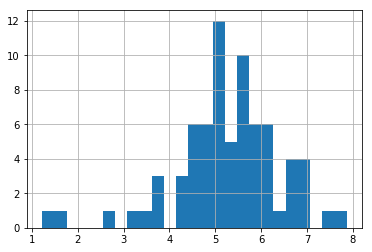

In [9]:
df.sort_values(['rating'], ascending = False).rating.hist(bins = 25)

In [ ]:
[1](http://tomaugspurger.github.io/modern-1-intro.html)
[2](http://tomaugspurger.github.io/method-chaining.html)
[3](http://tomaugspurger.github.io/modern-3-indexes.html)
[4](http://tomaugspurger.github.io/modern-4-performance.html)
[5](http://tomaugspurger.github.io/modern-5-tidy.html)
[6](http://tomaugspurger.github.io/modern-6-visualization.html)
[7](http://tomaugspurger.github.io/modern-7-timeseries.html)